In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Data Cleaning

In [2]:
#Creating pandas object
db = pd.read_csv('../data/bigml.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
db.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
db['customer_service_calls'] = db['customer service calls']

In [7]:
db['total_day_charge'] = db['total day charge']

In [8]:
db['total_eve_charge'] = db['total eve charge']

In [9]:
db['total_night_charge'] = db['total night charge']

In [10]:
db['total_intl_charge'] = db['total intl charge']

In [11]:
db.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,customer_service_calls,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,45.07,16.78,11.01,2.70
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1,27.47,16.62,11.45,3.70
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,41.38,10.30,7.32,3.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,2,50.90,5.26,8.86,1.78
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,3,28.34,12.61,8.41,2.73


In [12]:
#Creating Churn column as int

In [13]:
db['churn'] = db['churn'].astype(int)

In [14]:
db['churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [15]:
#Creating df containing calls/charges info

In [16]:
call_charge_mins = db.drop(['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'customer service calls', 'churn'], axis=1)

In [17]:
call_charge_mins.head()

,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer_service_calls,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,45.07,16.78,11.01,2.70
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,27.47,16.62,11.45,3.70
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,41.38,10.30,7.32,3.29
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,50.90,5.26,8.86,1.78
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,28.34,12.61,8.41,2.73


In [18]:
min_df = db.filter(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])

In [19]:
min_df.head()

,total day minutes,total eve minutes,total night minutes,total intl minutes
0,265.1,197.4,244.7,10.0
1,161.6,195.5,254.4,13.7
2,243.4,121.2,162.6,12.2
3,299.4,61.9,196.9,6.6
4,166.7,148.3,186.9,10.1


In [20]:
calls_df = db.filter(['total day calls', 'total eve calls', 'total night calls', 'total intl calls'])

In [21]:
calls_df.head()

,total day calls,total eve calls,total night calls,total intl calls
0,110,99,91,3
1,123,103,103,3
2,114,110,104,5
3,71,88,89,7
4,113,122,121,3


In [22]:
charge_df = db.filter(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])

In [23]:
charge_df.head()

,total day charge,total eve charge,total night charge,total intl charge
0,45.07,16.78,11.01,2.70
1,27.47,16.62,11.45,3.70
2,41.38,10.30,7.32,3.29
3,50.90,5.26,8.86,1.78
4,28.34,12.61,8.41,2.73


In [24]:
#Creating df that contains international info as well as voicemail plan info

In [25]:
international = db.drop(['state', 'account length', 'area code', 'phone number', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge'], axis=1)

In [26]:
int_plan_vm = international.filter(['international plan', 'voice mail plan'])

In [27]:
int_plan_vm.head()

,international plan,voice mail plan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


In [28]:
int_plan_vm_dummies = pd.get_dummies(int_plan_vm)

In [29]:
int_plan_vm_dummies.head()

,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


In [30]:
international.head()

,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,customer_service_calls,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge
0,no,yes,25,10.0,3,2.70,1,0,1,45.07,16.78,11.01,2.70
1,no,yes,26,13.7,3,3.70,1,0,1,27.47,16.62,11.45,3.70
2,no,no,0,12.2,5,3.29,0,0,0,41.38,10.30,7.32,3.29
3,yes,no,0,6.6,7,1.78,2,0,2,50.90,5.26,8.86,1.78
4,yes,no,0,10.1,3,2.73,3,0,3,28.34,12.61,8.41,2.73


In [31]:
#Creating df that contains location info

In [32]:
local = db.filter(['state', 'account length', 'area code', 'churn'])

In [33]:
cust_serv_calls = db.filter(['customer service calls'])

In [34]:
#OHE on Customer service calls

In [35]:
cust_serv_encoded = pd.get_dummies(cust_serv_calls, columns = ['customer service calls'])

cust_serv_encoded

,customer service calls_0,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_4,customer service calls_5,customer service calls_6,customer service calls_7,customer service calls_8,customer service calls_9
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3328,0,0,1,0,0,0,0,0,0,0
3329,0,0,0,1,0,0,0,0,0,0
3330,0,0,1,0,0,0,0,0,0,0
3331,0,0,1,0,0,0,0,0,0,0


In [36]:
local.head()

,state,account length,area code,churn
0,KS,128,415,0
1,OH,107,415,0
2,NJ,137,415,0
3,OH,84,408,0
4,OK,75,415,0


# Plan forward

In [37]:
#plan:
# local = maybe competitors have higher coverage or better deals in certain areas
# international = maybe more languages need to be represented in customer service for int users, maybe international charges are too expensive
# calls_charge = for total usage maybe the rates for high amount users are too expensive

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, \
FunctionTransformer, PolynomialFeatures

from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

from sklearn.dummy import DummyClassifier


from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.metrics import plot_roc_curve

# Data Analysis

#### International + Customer Service Data

In [39]:
#Plots representing high correlation between international customers and leaving after only a few customer service calls

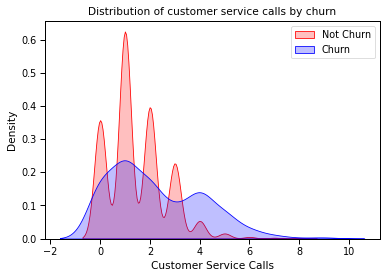

In [40]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(db.customer_service_calls[(db["churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(db.customer_service_calls[(db["churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Customer Service Calls');
ax.set_title('Distribution of customer service calls by churn');

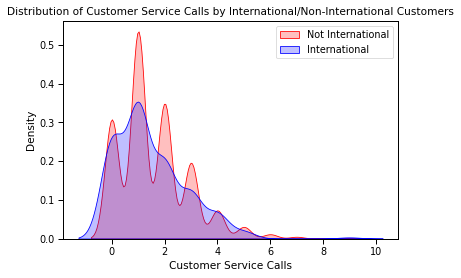

In [41]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(db.customer_service_calls[(db["international plan"] == "no") ],
                color="Red", shade = True);
ax = sns.kdeplot(db.customer_service_calls[(db["international plan"] == "yes") ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not International","International"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Customer Service Calls');
ax.set_title('Distribution of Customer Service Calls by International/Non-International Customers');

In [42]:
#These plots show a high correlation between low customer service calls and a significant increase in 
#churn rates for international customers

#### Charge Data

In [43]:
#Plot showing relationship between how many people churn and how much they are charged based on time of day

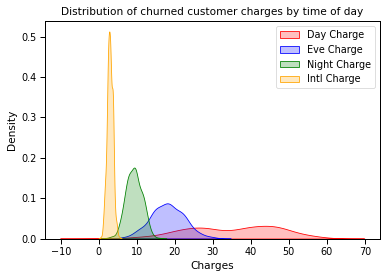

In [44]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(db.total_day_charge[(db["churn"] == 1) ],
                color="Red", shade = True);
ax = sns.kdeplot(db.total_eve_charge[(db["churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax = sns.kdeplot(db.total_night_charge[(db["churn"] == 1) ],
                ax =ax, color="Green", shade= True);
ax = sns.kdeplot(db.total_intl_charge[(db["churn"] == 1) ],
                ax =ax, color="Orange", shade= True);
ax.legend(["Day Charge","Eve Charge","Night Charge","Intl Charge"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Charges');
ax.set_title('Distribution of churned customer charges by time of day');

#### Location Data

In [45]:
#Table showing amount of churned customers based on state

In [46]:
local_churned = local[local.churn != 0]

In [47]:
local_churned.state.value_counts(ascending=False)

NJ    18
TX    18
MD    17
MI    16
NY    15
MN    15
NV    14
MS    14
SC    14
MT    14
WA    14
KS    13
ME    13
CT    12
AR    11
OR    11
NC    11
MA    11
UT    10
OH    10
WV    10
DE     9
NH     9
CA     9
OK     9
IN     9
WY     9
ID     9
CO     9
PA     8
VT     8
FL     8
AL     8
KY     8
GA     8
SD     8
WI     7
MO     7
NM     6
ND     6
RI     6
TN     5
IL     5
NE     5
DC     5
VA     5
LA     4
AZ     4
IA     3
HI     3
AK     3
Name: state, dtype: int64

In [48]:
#This table shows that there is no valuable relationship between certain areas of USA and churned customers, however more data 
#Could be evaluated to make a final judgement call (i.e. area codes subsets)

# Scaling and Creation of ML Model

In [49]:
#Using standard scalar to apply SMOTE to the dataset

In [50]:
ss = StandardScaler()
#ss.fit(call_charge_mins)
ss.fit(min_df)
ss.fit(calls_df)
ss.fit(charge_df)

StandardScaler()

In [51]:
#call_scaled = pd.DataFrame(ss.transform(call_charge_mins), columns = call_charge_mins.columns)

In [52]:
min_scaled = pd.DataFrame(ss.transform(min_df), columns = min_df.columns)

In [53]:
calls_scaled = pd.DataFrame(ss.transform(calls_df), columns = calls_df.columns)

In [54]:
charge_scaled = pd.DataFrame(ss.transform(charge_df), columns = charge_df.columns)

In [55]:
X = pd.concat( [min_scaled, calls_scaled, charge_scaled], axis=1)

In [56]:
#Setting X and Y

In [57]:
X.head()

,total day minutes,total eve minutes,total night minutes,total intl minutes,total day calls,total eve calls,total night calls,total intl calls,total day charge,total eve charge,total night charge,total intl charge
0,25.333392,41.836562,103.562920,9.600381,8.580396,19.006047,36.018257,0.312367,1.567036,-0.070427,0.866029,-0.085690
1,14.153926,41.395729,107.825660,14.509760,9.984580,19.934117,41.291751,0.312367,-0.334013,-0.107549,1.059390,1.241169
2,22.989485,24.156834,67.483435,12.519471,9.012452,21.558239,41.731208,2.966085,1.168464,-1.573900,-0.755571,0.697156
3,29.038278,10.398200,82.556837,5.089060,4.367843,16.453855,35.139342,5.619804,2.196759,-2.743268,-0.078806,-1.306401
4,14.704799,30.444506,78.162259,9.733067,8.904438,24.342448,49.201991,0.312367,-0.240041,-1.037939,-0.276562,-0.045885


In [58]:
y = db['churn']

In [59]:
#Applying train test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Dummy Model

In [61]:
#instantiating dummy model

In [62]:
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [63]:
dummy_model.score(X_test, y_test)

0.8501199040767387

In [64]:
dummy_model.score(X_train, y_train)

0.8567426970788315

In [65]:
y_train.value_counts(normalize=True)

0    0.856743
1    0.143257
Name: churn, dtype: float64

In [66]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)

In [67]:
cv_results

array([0.858     , 0.856     , 0.856     , 0.856     , 0.85771543])

# Initiating class for model

In [68]:
#Creation of class for model - pulled from notes from class

In [69]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [70]:
dummy_model_results = ModelWithCV(
    model=dummy_model,
    model_name = 'Dummy',
    X=X_train,
    y=y_train
)

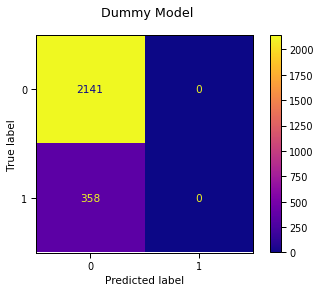

In [71]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

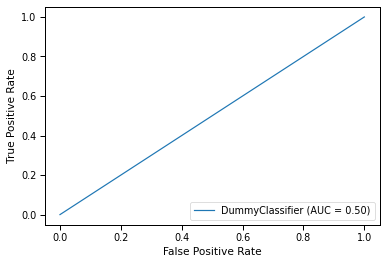

In [72]:
plot_roc_curve(dummy_model, X_train, y_train);

### More Data Preparation

In [73]:
#inclusion of scaled data and dummies/encoded data
X = pd.concat( [min_scaled, calls_scaled, charge_scaled, int_plan_vm_dummies, cust_serv_encoded], axis=1)
y = db['churn']

In [74]:
numeric_feature_names = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']
categorical_feature_names = ["international plan_no", "international plan_yes", "voice mail plan_no", "voice mail plan_yes", "customer service calls_0", "customer service calls_1", "customer service calls_2", "customer service calls_3", "customer service calls_4", "customer service calls_5", "customer service calls_6", "customer service calls_7", "customer service calls_8", "customer service calls_9"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [76]:
X_train_numeric = X_train[numeric_feature_names]
X_train_categorical = X_train[categorical_feature_names]

In [77]:
X_train = pd.concat([X_train_numeric, X_train_categorical], axis=1)

In [78]:
X_train.head()

,total day minutes,total eve minutes,total night minutes,total intl minutes,total day calls,total eve calls,total night calls,total intl calls,total day charge,total eve charge,total night charge,total intl charge,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,customer service calls_0,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_4,customer service calls_5,customer service calls_6,customer service calls_7,customer service calls_8,customer service calls_9
367,5.145545,54.829539,108.089335,20.215254,10.416636,21.094204,39.973377,0.312367,-1.865654,1.033976,1.072574,2.780325,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3103,17.858812,48.704278,133.665778,13.846330,8.688410,21.094204,45.686329,-2.341351,0.295710,0.514257,2.219559,1.055408,1,0,1,0,0,0,1,0,0,0,0,0,0,0
549,22.308995,43.739105,82.468946,9.733067,3.503730,23.182361,33.381510,2.966085,1.052889,0.091986,-0.083200,-0.045885,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2531,12.177267,37.915468,76.975723,9.733067,11.172736,22.254291,34.260426,1.639226,-0.669937,-0.404532,-0.329297,-0.045885,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2378,18.971358,34.203189,57.683526,13.050215,9.876566,17.845960,40.412835,5.619804,0.484734,-0.720075,-1.199423,0.843111,1,0,1,0,0,0,0,1,0,0,0,0,0,0


## Logreg

In [79]:
#Creation of logistic regression model

In [80]:
simple_logreg_model = LogisticRegression(penalty='none', random_state=42).fit(X_train, y_train)

C:\Users\happy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
simple_logreg_results = ModelWithCV(
    model=simple_logreg_model,
    model_name = 'Simple LogReg',
    X=X_train,
    y=y_train
)

C:\Users\happy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\happy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

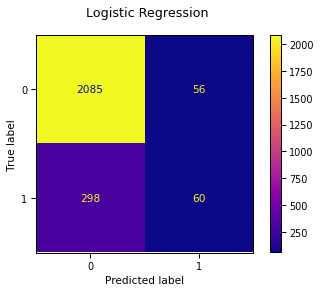

In [82]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression")

plot_confusion_matrix(simple_logreg_model, X_train, y_train, ax=ax, cmap="plasma");

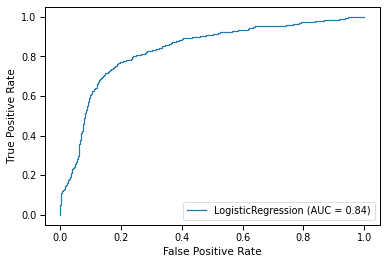

In [83]:
# ROC logreg model train
plot_roc_curve(simple_logreg_model, X_train, y_train)

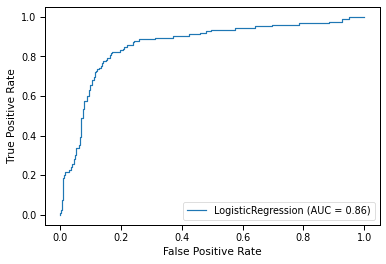

In [84]:
# ROC logreg model test
plot_roc_curve(simple_logreg_model, X_test, y_test)

## Logreg Higher Iteration + More Tolerance

In [85]:
#Creating models with more iterations as well as higher tolerance - courtesy of notes from class

In [86]:
logreg_model_more_iterations = LogisticRegression(penalty='none',
                                                  random_state=42,
                                                  max_iter=10000)

In [87]:
logreg_model_more_iterations.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty='none', random_state=42)

In [92]:
logreg_model_higher_tolerance = LogisticRegression(penalty='none',
                                                  random_state=42,
                                                  tol = 25)

In [93]:
logreg_model_higher_tolerance.fit(X_train, y_train)

C:\Users\happy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=42, tol=25)

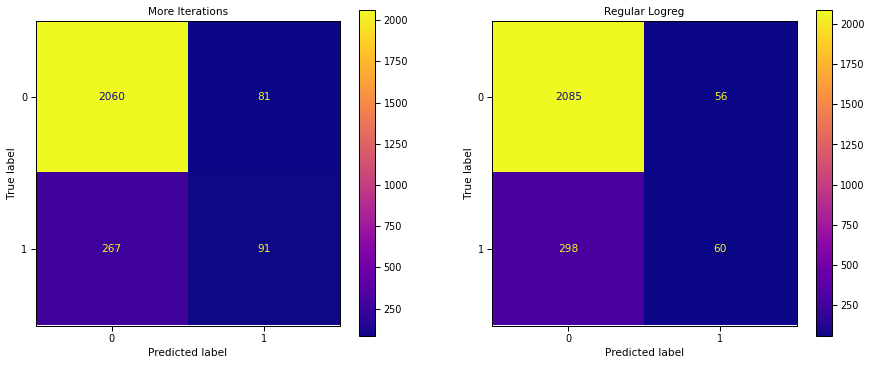

In [94]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Regular Logreg")

plot_confusion_matrix(logreg_model_more_iterations, X_train, y_train,
                      ax=axes[0], cmap="plasma")
plot_confusion_matrix(logreg_model_higher_tolerance, X_train, y_train,
                      ax=axes[1], cmap="plasma");

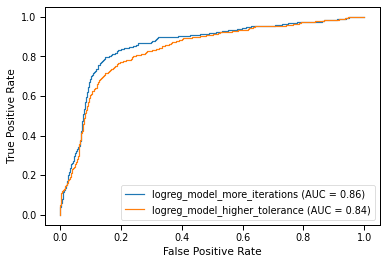

In [95]:
fig, ax = plt.subplots()

plot_roc_curve(logreg_model_more_iterations, X_train, y_train, 
               name='logreg_model_more_iterations', ax=ax)
plot_roc_curve(logreg_model_higher_tolerance, X_train, y_train, 
               name='logreg_model_higher_tolerance', ax=ax);

In [96]:
logreg_model_more_iterations_results = ModelWithCV(
                                        logreg_model_more_iterations,
                                        'more_iterations',
                                        X_train,
                                        y_train
)
    
logreg_model_higher_tolerance_results = ModelWithCV(
                                        logreg_model_higher_tolerance,
                                        'higher_tolerance',
                                        X_train,
                                        y_train
)

model_results = [
    logreg_model_more_iterations_results,
    logreg_model_higher_tolerance_results
]

C:\Users\happy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\happy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

## Gridsearch Model

In [97]:
X_train.head()

,total day minutes,total eve minutes,total night minutes,total intl minutes,total day calls,total eve calls,total night calls,total intl calls,total day charge,total eve charge,total night charge,total intl charge,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,customer service calls_0,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_4,customer service calls_5,customer service calls_6,customer service calls_7,customer service calls_8,customer service calls_9
367,5.145545,54.829539,108.089335,20.215254,10.416636,21.094204,39.973377,0.312367,-1.865654,1.033976,1.072574,2.780325,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3103,17.858812,48.704278,133.665778,13.846330,8.688410,21.094204,45.686329,-2.341351,0.295710,0.514257,2.219559,1.055408,1,0,1,0,0,0,1,0,0,0,0,0,0,0
549,22.308995,43.739105,82.468946,9.733067,3.503730,23.182361,33.381510,2.966085,1.052889,0.091986,-0.083200,-0.045885,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2531,12.177267,37.915468,76.975723,9.733067,11.172736,22.254291,34.260426,1.639226,-0.669937,-0.404532,-0.329297,-0.045885,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2378,18.971358,34.203189,57.683526,13.050215,9.876566,17.845960,40.412835,5.619804,0.484734,-0.720075,-1.199423,0.843111,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [98]:
X_test.head()

,total day minutes,total eve minutes,total night minutes,total intl minutes,total day calls,total eve calls,total night calls,total intl calls,total day charge,total eve charge,total night charge,total intl charge,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,customer service calls_0,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_4,customer service calls_5,customer service calls_6,customer service calls_7,customer service calls_8,customer service calls_9
438,13.441033,72.741285,79.260904,14.244388,6.744155,20.630169,50.080906,0.312367,-0.454989,2.556011,-0.228221,1.174826,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2674,8.483183,46.476911,78.821446,13.315586,9.336495,24.806483,57.991147,4.292945,-1.297499,0.324003,-0.245800,0.922722,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1345,-3.301162,33.066303,69.460995,5.354432,-3.301162,26.198587,34.699884,-2.341351,-3.301162,-0.815203,-0.667679,-1.226789,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1957,19.684251,43.391079,64.670905,9.865753,5.231957,17.149907,45.686329,-1.014492,0.606790,0.061823,-0.883013,-0.019348,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2148,12.252877,48.170638,96.092137,9.600381,7.716282,12.973594,36.018257,5.619804,-0.656975,0.467854,0.532041,-0.085690,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [99]:
#GridSearch Model

In [100]:
# Build a grid
grid = {
    'penalty' : ['l2'],
    'solver' : ['sag'],
    'max_iter' : [5000,20000,200000,600000],
    'C' : [0.01, 0.1, 1,10],
    'tol' : [.001, .01, .1, 1]
}

In [101]:
# Instantiate the object

gs = GridSearchCV(estimator=LogisticRegression(),
    param_grid=grid,
    cv=5,
    verbose=1,
    n_jobs=-1)

In [102]:
# Fit

gs.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    8.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'max_iter': [5000, 20000, 200000, 600000],
                         'penalty': ['l2'], 'solver': ['sag'],
                         'tol': [0.001, 0.01, 0.1, 1]},
             verbose=1)

In [103]:
# Parameters

gs.best_params_

{'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}

In [104]:
# Score
gs.score(X_train, y_train)

0.8643457382953181

In [105]:
gs.score(X_test, y_test)

0.8633093525179856

In [106]:
# Estimator

gs_model = gs.best_estimator_

CV Results for `gs_model` model:
            0.86235 ± 0.01630 accuracy
        


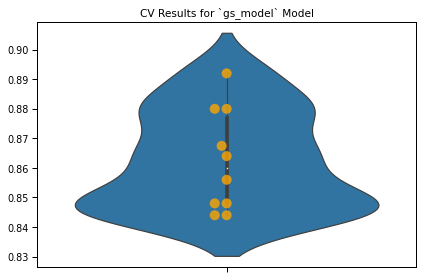

In [107]:
# Evaluate
gs_model_results = ModelWithCV(
                        model=gs_model,
                        model_name='gs_model',
                        X=X_train, 
                        y=y_train
)

fig, ax = plt.subplots()

ax = gs_model_results.plot_cv(ax)
plt.tight_layout();

gs_model_results.print_cv_summary()

# Final Analysis

In [108]:
# Create a way to categorize our different models
model_candidates = [
    {
        'name':'dummy_model'
        ,'model':dummy_model
        ,'X_test':X_test
        ,'y_test':y_test
    },
    {
        'name':'simple_logreg_model'
        ,'model':simple_logreg_model
        ,'X_test':X_test
        ,'y_test':y_test
    },
    {
        'name':'logreg_model_more_iterations'
        ,'model':logreg_model_more_iterations
        ,'X_test':X_test
        ,'y_test':y_test
    },
    {
        'name':'logreg_model_higher_tolerance'
        ,'model':logreg_model_higher_tolerance
        ,'X_test':X_test
        ,'y_test':y_test
    },
    {
        'name':'gs_model'
        ,'model':gs_model
        ,'X_test':X_test
        ,'y_test':y_test
    }
]

In [109]:
#Creating a dictionary for final scores

In [110]:
final_scores_dict = {
    "Model Name": [candidate.get('name') for candidate in model_candidates],
    "Mean Accuracy": [
        candidate.get('model').score(
                                candidate.get('X_test'), 
                                candidate.get('y_test')
        ) 
        for candidate in model_candidates
    ]
    
}
final_scores_df = pd.DataFrame(final_scores_dict).set_index('Model Name')
final_scores_df

,Mean Accuracy
Model Name,
dummy_model,0.850120
simple_logreg_model,0.868106
logreg_model_more_iterations,0.859712
logreg_model_higher_tolerance,0.868106
gs_model,0.863309


In [111]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [112]:
#Creation of confusion matrices for final analysis

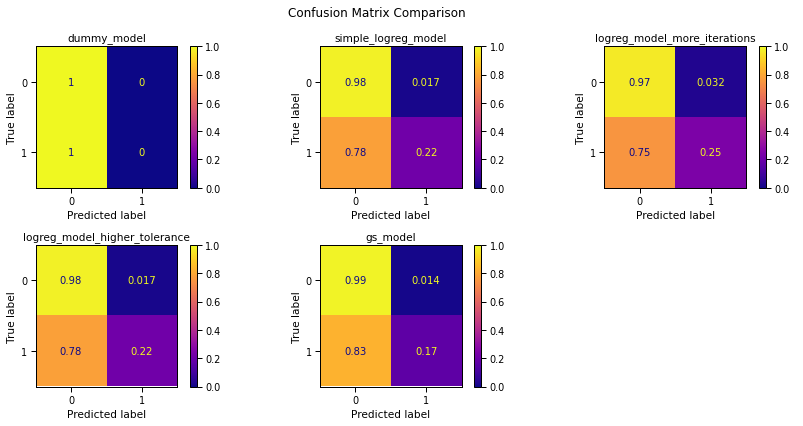

In [113]:
nrows = 2
ncols = math.ceil(len(model_candidates)/nrows)

fig, axes = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(12, 6)
)
fig.suptitle("Confusion Matrix Comparison")

# Turn off all the axes (in case nothing to plot); turn on while iterating over
[ax.axis('off') for ax in axes.ravel()]


for i,candidate in enumerate(model_candidates):
    # Logic for making rows and columns for matrices
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    ax.set_title(candidate.get('name'))
    ax.set_axis_on() 
    cm_display = plot_confusion_matrix(
                    candidate.get('model'),
                    candidate.get('X_test'),
                    candidate.get('y_test'),
                    normalize='true',
                    cmap='plasma',
                    ax=ax,
                    
    )
    cm_display.im_.set_clim(0, 1)

plt.tight_layout()

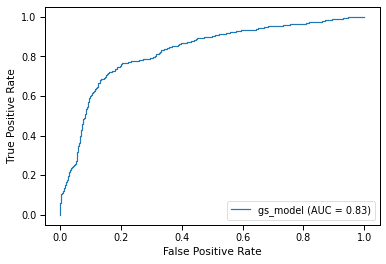

In [114]:
#ROC train gs model
fig, ax = plt.subplots()

plot_roc_curve(gs_model, X_train, y_train, 
               name='gs_model', ax=ax);

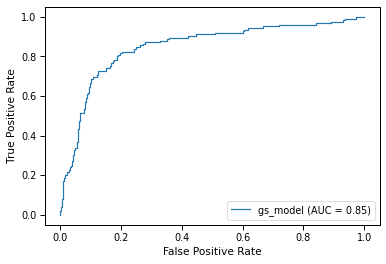

In [115]:
#ROC test gs model
fig, ax = plt.subplots()

plot_roc_curve(gs_model, X_test, y_test, 
               name='gs_model', ax=ax);